# Healthcare data Feature Engineering and Unsupervised Learning

In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

#pd.options.display.float_format = '{:.2f}'.format

In [2]:
pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 26.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for pyod: filename=pyod-1.0.3-py3-none-any.whl size=154726 sha256=e1417ed15a4b7b9dcb3d0293c230649e9278478e31c15eb5ba62a38705dad085
  Stored in directory: /root/.cache/pip/wheels/60/1e/04/b42e786399bd7503af674d1ec95d93665b1700309ec3525b65
Successfully built pyod
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
pip install combo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for combo: filename=combo-0.1.3-py3-none-any.whl size=42884 sha256=04c72bc11611be41c838698e018a3c206267b6c32e5dfcf8201aac15ca617c01
  Stored in directory: /root/.cache/pip/wheels/b1/6e/c9/89dab355d4d5d58b11fe135b5839e8a3acc8b73273ffc68cde
Successfully built combo


## Section 1: Data preparation <a class="anchor" id="Section_1"></a>
### Section 1.1: Load Data <a class="anchor" id="Section_11"></a>
* Import packages and data 
* Rename column
* Change data type and transfer spending amount with dollar sign into numeric
* Understand the data strcuture. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data = pd.read_csv('/content/inpatientCharges.csv')

In [6]:
#data.describe()
#data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8    Total Discharges                     163065 non-null  int64 
 9    Average Covered Charges              163065 non-null  object
 10   Average Total Payments               163065 non-null  object
 11  Average Medic

In [7]:
data.columns = ['DRG','Provider_Id', 'Provider_Name','Provider_StreetAddress','Provider_City',
               'Provider_State','Provider_Zipcode','Hospital_referral_region_desp',
                'Total_Discharges','Average_Covered_Charges','Average_Total_Payments',
                'Average_Medicare_Payment']
data = data.drop('Average_Covered_Charges',axis=1)

In [8]:
data.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$5658.33,$4851.44


In [9]:
# Distribution plots of average total payments 
data['Average_Total_Payments'].describe()

count       163065
unique      147842
top       $4370.00
freq             9
Name: Average_Total_Payments, dtype: object

In [10]:
data['Provider_Id'].nunique()

3337

In [11]:
# Change data type and transfer spending amount with dollar sign into numeric
data['DRG'] = data['DRG'].astype('category')
data['Provider_State'] = data['Provider_State'].astype('category')
data['Provider_City'] = data['Provider_City'].astype('category')
data['Provider_Id'] = data['Provider_Id'].astype('category')
data['Average_Total_Payments'] = (data['Average_Total_Payments']
                              .str.replace(r'[^-+\d.]', '').astype(float))
data['Average_Medicare_Payment'] = (data['Average_Medicare_Payment']
                              .str.replace(r'[^-+\d.]', '').astype(float))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   DRG                            163065 non-null  category
 1   Provider_Id                    163065 non-null  category
 2   Provider_Name                  163065 non-null  object  
 3   Provider_StreetAddress         163065 non-null  object  
 4   Provider_City                  163065 non-null  category
 5   Provider_State                 163065 non-null  category
 6   Provider_Zipcode               163065 non-null  int64   
 7   Hospital_referral_region_desp  163065 non-null  object  
 8   Total_Discharges               163065 non-null  int64   
 9   Average_Total_Payments         163065 non-null  float64 
 10  Average_Medicare_Payment       163065 non-null  float64 
dtypes: category(4), float64(2), int64(2), object(3)
memory usage: 9.9+ MB


## Section 2: EDA <a class="anchor" id="Section_2"></a>
### Section 2.1: Distribution plots <a class="anchor" id="Section_21"></a>

In [13]:
# Distribution plots of average total payments 
data['Average_Total_Payments'].describe()

count    163065.000000
mean       9707.473804
std        7664.642598
min        2673.000000
25%        5234.500000
50%        7214.100000
75%       11286.400000
max      156158.180000
Name: Average_Total_Payments, dtype: float64

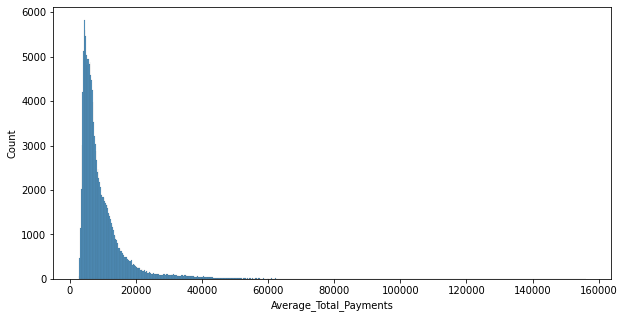

In [14]:
plt.figure(figsize=(10,5)) # Plot a graph with reasonable size.
sns.histplot(data['Average_Total_Payments'])
# plt.plot(data['Average_Total_Payments'])

* One plot is enough. The following plot can be omitted.

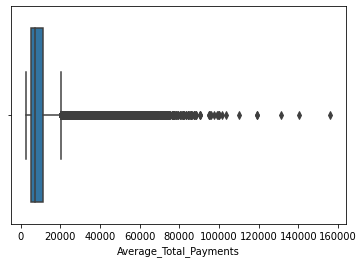

In [15]:
sns.boxplot(x = 'Average_Total_Payments', data = data) 

* From those 2 plots we can see 75% of the charges are under 10,000 dollar, but the highest charge amounts to 156,158

### Section 2.2: Count by State <a class="anchor" id="Section_22"></a>

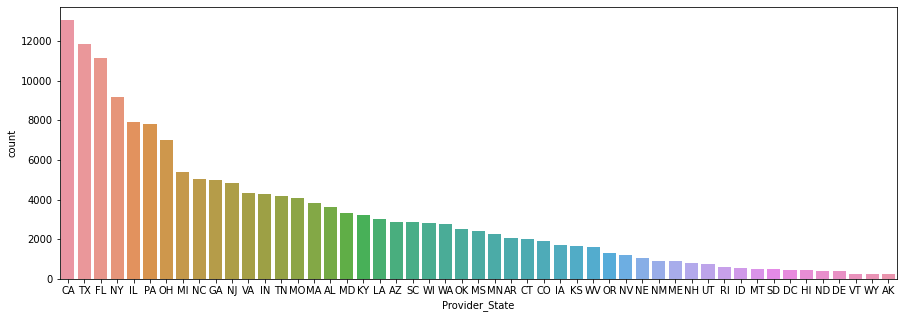

In [16]:
# data['Provider_State'].value_counts()
plt.figure(figsize=(15,5))
sns.countplot(x='Provider_State',data=data,order=data['Provider_State'].value_counts().index)
#plt.xticks(rotation = 90)
#ax = plt.gca()
#for p in ax.patches:
#    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#            fontsize=12, color='blue', ha='center', va='bottom')
plt.rcParams["axes.labelsize"] = 20

### Section 2.2.1: Distribution of Average Total Payments by States <a class="anchor" id="Section_22"></a>

In [17]:
#sns.displot(data, x="Average_Total_Payments", col="Provider_State")


- Almost all states have a right skewed distribution

### Section 2.3: Count of top 20 cities <a class="anchor" id="Section_23"></a>

In [18]:
data['Provider_Name'].value_counts()

GOOD SAMARITAN HOSPITAL                  633
ST JOSEPH MEDICAL CENTER                 427
MERCY MEDICAL CENTER                     357
MERCY HOSPITAL                           347
ST JOSEPH HOSPITAL                       343
                                        ... 
J PAUL JONES HOSPITAL                      1
GREATER BATON ROUGE SURGICAL HOSPITAL      1
FAIRWAY MEDICAL CENTER                     1
MONROE SURGICAL HOSPITAL                   1
EAGLEVILLE HOSPITAL                        1
Name: Provider_Name, Length: 3201, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

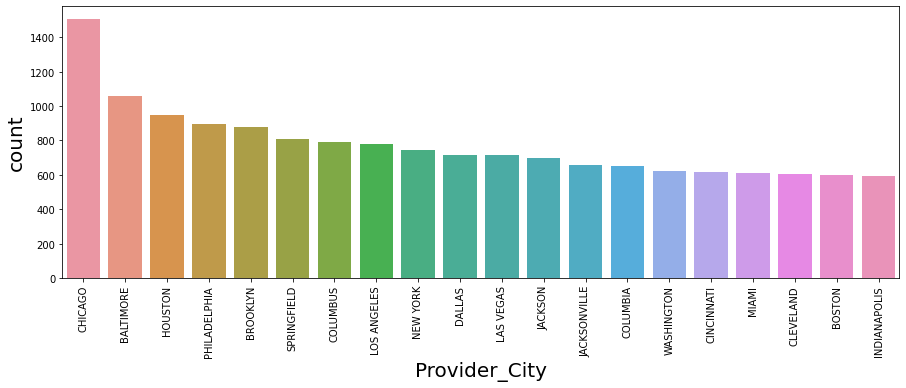

In [19]:
plt.figure(figsize=(15,5))
ch = sns.countplot(x='Provider_City',data=data,order=data['Provider_City'].value_counts()[:20].index)
plt.xticks(rotation = 90)
# junk = ch.set_xticklabels(ch.get_xticklabels()) # Use this line to collect the text prints
                          
#ax = plt.gca()
#plt.rcParams["axes.labelsize"] = 20


# b.set_xlabel("X Label",fontsize=30)
# b.set_ylabel("Y Label",fontsize=20)
# b.tick_params(labelsize=5)

# for p in ax.patches:
#     ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#             fontsize=12, color='blue', ha='center', va='bottom')
# plt.rcParams["axes.labelsize"] = 20

* The above text are from matplotlib. 
* We really do not want to print the text. 
* You can assign them to "_" to throw them away.

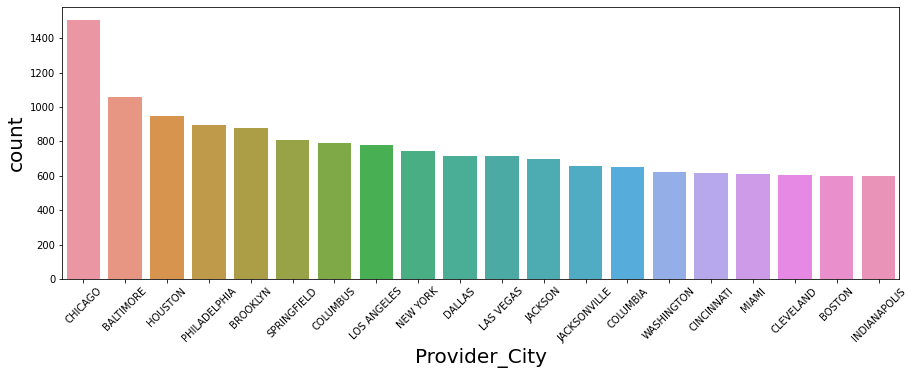

In [20]:
# This will look better
plt.figure(figsize=(15,5))
txt = data['Provider_City'].value_counts()[:20].index

chart = sns.countplot(
    x='Provider_City' ,data=data , order=txt
)

_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.rcParams["axes.labelsize"] = 10

### Section 2.4: Variables pair plot

In [21]:
# cut by percentile for plotting
var = 'Average_Total_Payments'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
data[binned_var] = pd.qcut( data[var],percentile)
data[['Average_Total_Payments_D']]

,Average_Total_Payments_D
0,"(4874.14, 7214.1]"
1,"(4874.14, 7214.1]"
2,"(4874.14, 7214.1]"
3,"(4874.14, 7214.1]"
4,"(4874.14, 7214.1]"
...,...
163060,"(3333.76, 3862.834]"
163061,"(3862.834, 4874.14]"
163062,"(4874.14, 7214.1]"
163063,"(7214.1, 12538.0]"


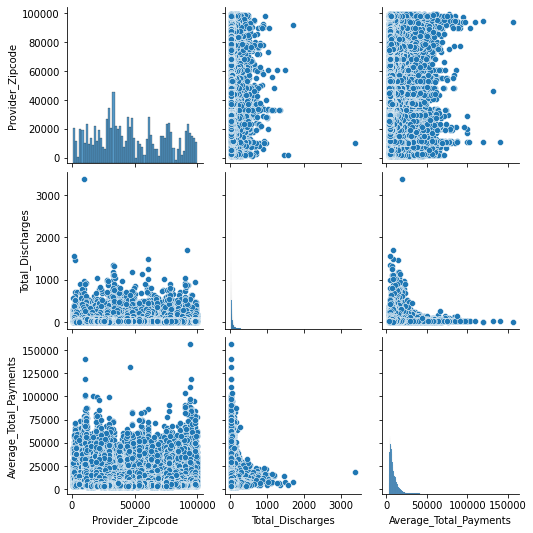

In [22]:
var_list = data.columns[0:10]
sns.pairplot(data[var_list])

- It seems that total discharges have some impact on average total payments while zipcode does not. 

In [23]:
data.groupby('DRG')['Average_Total_Payments'].describe().reset_index()

,DRG,count,mean,std,min,25%,50%,75%,max
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,1079.0,6960.534004,1477.873952,4968.00,6001.8300,6582.890,7516.825,18420.56
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,1201.0,6706.276445,2033.965862,4194.09,5412.8700,6093.750,7345.360,25519.43
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1659.0,13263.823032,3847.918207,8174.28,10762.2200,12084.700,14424.325,50882.40
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,2269.0,7922.671141,2084.658336,5368.73,6626.2700,7280.050,8503.060,26510.15
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1806.0,5713.985221,1342.538675,3916.41,4819.3250,5326.025,6197.480,14744.05
...,...,...,...,...,...,...,...,...,...
95,885 - PSYCHOSES,613.0,6968.721876,2440.280958,4444.90,5477.2400,6155.560,7841.280,32200.77
96,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,906.0,4949.907307,1462.463278,3172.44,3969.9675,4529.535,5440.675,18630.92
97,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,843.0,10763.814413,2823.004637,6942.83,8851.4550,10062.280,11788.675,33251.14
98,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,1382.0,4485.378734,1154.328951,3040.72,3720.5725,4136.105,4879.390,12479.80


## Section 3: Feature Engineering <a class="anchor" id="Section_3"></a>


#### Discussions:
* Think of the objective: "Detect any hospital that may abuse the resources compared to the average of its peers of the same DRG and State."
* A feature should be able to "detect any hospital...". The above table does not have hospitals.
* The above table is the benchmark. Are they features?

### Section 3.1: Create the benchmark table - State & DRG average <a class="anchor" id="Section_31"></a>

In [24]:
benchmark = data.groupby(['Provider_State','DRG'])['Average_Total_Payments'].mean().reset_index()
benchmark.columns = ['Provider_State','DRG','Avg_Payment_ByStateDRG']
benchmark.head()

,Provider_State,DRG,Avg_Payment_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,8401.950000
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8799.000000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21608.010000
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12555.548333
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,9275.867500


### Feature 1: Ratio of average payment by Provider_State and DRG

#### Thoughts: 
- First we created the benchmark table, the average of payments grouped by state and drug.
- Then we proceed to merge the benchmark with the original table to get the individual transaction data. 
- After we get the ratio, we would be able to draw some conclusions regarding the outliers. 

In [25]:
# add the new feature average spending to the dataset 
df = pd.merge(data, benchmark, how='left', on=['Provider_State', 'DRG'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df['state_drg_avg_ratio_amount'] = np.where(df['Avg_Payment_ByStateDRG']==0,0, df['Average_Total_Payments'] / df['Avg_Payment_ByStateDRG'])
df['state_drg_avg_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.195274
min           0.384805
25%           0.880824
50%           0.956830
75%           1.064688
max           7.857934
Name: state_drg_avg_ratio_amount, dtype: float64

In [26]:
# cut by percentile for plotting
var = 'state_drg_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df[binned_var] = pd.qcut( df[var],percentile)
df[['state_drg_avg_ratio_amount_D']]

,state_drg_avg_ratio_amount_D
0,"(0.957, 1.102]"
1,"(0.957, 1.102]"
2,"(0.864, 0.957]"
3,"(0.864, 0.957]"
4,"(0.957, 1.102]"
...,...
163060,"(0.785, 0.864]"
163061,"(0.864, 0.957]"
163062,"(1.102, 1.383]"
163063,"(1.383, 1.663]"


[Text(0, 0, '(0.384, 0.694]'),
 Text(0, 0, '(0.694, 0.785]'),
 Text(0, 0, '(0.785, 0.864]'),
 Text(0, 0, '(0.864, 0.957]'),
 Text(0, 0, '(0.957, 1.102]'),
 Text(0, 0, '(1.102, 1.383]'),
 Text(0, 0, '(1.383, 1.663]'),
 Text(0, 0, '(1.663, 7.858]')]

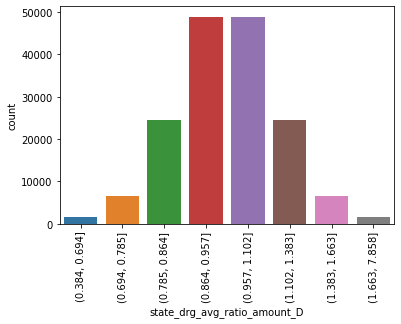

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="state_drg_avg_ratio_amount_D", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


#### Thoughts:
- We can see from the graph that the ratio that is higher than 1.383 could be considered high ratio, which means the amount is a lot higher than the average amount by state and drug. So these transactions are suspicious. 

In [28]:
df[df['state_drg_avg_ratio_amount']>1.383].head()


,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_D,Avg_Payment_ByStateDRG,state_drg_avg_ratio_amount,state_drg_avg_ratio_amount_D
7,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,32,8031.12,5858.50,"(7214.1, 12538.0]",5743.611739,1.398270,"(1.383, 1.663]"
31,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,30023,FLAGSTAFF MEDICAL CENTER,1200 NORTH BEAVER STREET,FLAGSTAFF,AZ,86001,AZ - Phoenix,15,11026.33,9056.06,"(7214.1, 12538.0]",7271.555833,1.516365,"(1.383, 1.663]"
59,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,40078,NATIONAL PARK MEDICAL CENTER,1910 MALVERN AVENUE,HOT SPRINGS,AR,71901,AR - Little Rock,18,9838.11,8533.83,"(7214.1, 12538.0]",6118.828750,1.607842,"(1.383, 1.663]"
88,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50180,JOHN MUIR MEDICAL CENTER - WALNUT CREEK CAMPUS,1601 YGNACIO VALLEY RD,WALNUT CREEK,CA,94598,CA - Contra Costa County,20,12355.85,6776.50,"(7214.1, 12538.0]",8387.932687,1.473051,"(1.383, 1.663]"
97,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50262,RONALD REAGAN UCLA MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,13,11899.76,10946.84,"(7214.1, 12538.0]",8387.932687,1.418676,"(1.383, 1.663]"


#### Conclusion:
- This feature calculates the ratio of the individual payment to the average payment grouped by provider state and drug name. For the high ratio samples, we can say that the transaction is suspicious because compared with other transactions that happend in the same state with the same drug, it costs more. This feature helps with prediction because it isolated this key information about the payment amount by state and drug, and highlighting the pattern of people's average amount. 

### Feature 2: Ratio of median payment by Provider_State and DRG

#### Thoughts: 
- First, we are going to create a benchmark table, which is the data grouped by provider state and drug. This lays down the foundation for the feature creation. 

In [29]:
benchmark = data.groupby(['Provider_State','DRG'])['Average_Total_Payments'].median().reset_index()
benchmark.columns = ['Provider_State','DRG','med_Payment_ByStateDRG']
benchmark.head()

,Provider_State,DRG,med_Payment_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,8401.950
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8799.000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21608.010
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12437.045
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,9320.250


In [30]:
# add the new feature average spending to the dataset 
df = pd.merge(df, benchmark, how='left', on=['Provider_State', 'DRG'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df['state_drg_med_ratio_amount'] = np.where(df['med_Payment_ByStateDRG']==0,0, df['Average_Total_Payments'] / df['med_Payment_ByStateDRG'])
df['state_drg_med_ratio_amount'].describe()

count    163065.000000
mean          1.050746
std           0.211465
min           0.517695
25%           0.925511
50%           1.000000
75%           1.112126
max           9.338775
Name: state_drg_med_ratio_amount, dtype: float64

In [31]:
# cut by percentile for plotting
var = 'state_drg_med_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df[binned_var] = pd.qcut( df[var],percentile)
df[['state_drg_med_ratio_amount_D']]

,state_drg_med_ratio_amount_D
0,"(1.0, 1.153]"
1,"(1.0, 1.153]"
2,"(0.908, 1.0]"
3,"(0.908, 1.0]"
4,"(0.908, 1.0]"
...,...
163060,"(0.83, 0.908]"
163061,"(0.908, 1.0]"
163062,"(1.153, 1.466]"
163063,"(1.466, 1.79]"


[Text(0, 0, '(0.517, 0.75]'),
 Text(0, 0, '(0.75, 0.83]'),
 Text(0, 0, '(0.83, 0.908]'),
 Text(0, 0, '(0.908, 1.0]'),
 Text(0, 0, '(1.0, 1.153]'),
 Text(0, 0, '(1.153, 1.466]'),
 Text(0, 0, '(1.466, 1.79]'),
 Text(0, 0, '(1.79, 9.339]')]

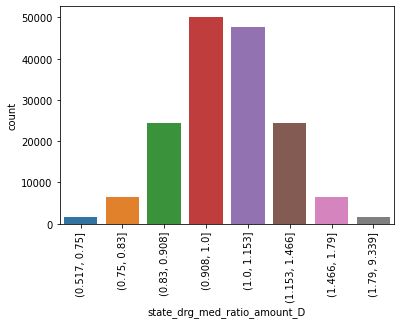

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="state_drg_med_ratio_amount_D", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


#### Thoughts:
- We can see from the graph that the ratio that is higher than 1.466 could be considered high ratio, which means the amount is a lot higher than the median amount by state and drug. So these transactions are suspicious. Because in the same state for the same drug, the price is more than likely to be similar. If the ratio indicates otherwise, it would be outliers.  

In [33]:
df[df['state_drg_med_ratio_amount']>1.466].head()


,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_D,Avg_Payment_ByStateDRG,state_drg_avg_ratio_amount,state_drg_avg_ratio_amount_D,med_Payment_ByStateDRG,state_drg_med_ratio_amount,state_drg_med_ratio_amount_D
31,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,30023,FLAGSTAFF MEDICAL CENTER,1200 NORTH BEAVER STREET,FLAGSTAFF,AZ,86001,AZ - Phoenix,15,11026.33,9056.06,"(7214.1, 12538.0]",7271.555833,1.516365,"(1.383, 1.663]",6959.89,1.584268,"(1.466, 1.79]"
59,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,40078,NATIONAL PARK MEDICAL CENTER,1910 MALVERN AVENUE,HOT SPRINGS,AR,71901,AR - Little Rock,18,9838.11,8533.83,"(7214.1, 12538.0]",6118.828750,1.607842,"(1.383, 1.663]",5890.00,1.670307,"(1.466, 1.79]"
88,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50180,JOHN MUIR MEDICAL CENTER - WALNUT CREEK CAMPUS,1601 YGNACIO VALLEY RD,WALNUT CREEK,CA,94598,CA - Contra Costa County,20,12355.85,6776.50,"(7214.1, 12538.0]",8387.932687,1.473051,"(1.383, 1.663]",7863.14,1.571363,"(1.466, 1.79]"
97,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50262,RONALD REAGAN UCLA MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,13,11899.76,10946.84,"(7214.1, 12538.0]",8387.932687,1.418676,"(1.383, 1.663]",7863.14,1.513360,"(1.466, 1.79]"
104,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50334,SALINAS VALLEY MEMORIAL HOSPITAL,450 EAST ROMIE LANE,SALINAS,CA,93901,CA - Salinas,17,16744.82,7051.05,"(12538.0, 23926.526]",8387.932687,1.996299,"(1.663, 7.858]",7863.14,2.129533,"(1.79, 9.339]"


#### Conclusion:
- This feature calculates the ratio of the individual payment to the median payment grouped by provider state and drug name. For the high ratio samples, we can say that the transaction is suspicious because compared with other transactions that happend in the same state with the same drug, it costs more. This feature helps with prediction because it isolated this key information about the payment amount by state and drug, and highlighting the pattern of people's average amount. 

### Feature 3: Ratio of average payment by Provider_id

#### Thoughts: 
- First, we are going to create a benchmark table, which is the data grouped by provider id. This lays down the foundation for the feature creation. 

In [34]:
benchmark = data.groupby(['Provider_Id'])['Average_Total_Payments'].mean().reset_index()
benchmark.columns = ['Provider_Id','avg_Payment_ById']
benchmark.head()

,Provider_Id,avg_Payment_ById
0,10001,8749.025109
1,10005,6812.131224
2,10006,8197.237907
3,10007,4860.829091
4,10008,5898.136667


In [35]:
# add the new feature average spending to the dataset 
df = pd.merge(df, benchmark, how='left', on=['Provider_Id'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df['id_avg_ratio_amount'] = np.where(df['avg_Payment_ById']==0,0, df['Average_Total_Payments'] / df['avg_Payment_ById'])
df['id_avg_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.680612
min           0.142642
25%           0.579320
50%           0.779759
75%           1.189379
max           8.268243
Name: id_avg_ratio_amount, dtype: float64

In [36]:
# cut by percentile for plotting
var = 'id_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df[binned_var] = pd.qcut( df[var],percentile)
df[['id_avg_ratio_amount_D']]

,id_avg_ratio_amount_D
0,"(0.542, 0.78]"
1,"(0.78, 1.301]"
2,"(0.542, 0.78]"
3,"(0.542, 0.78]"
4,"(0.542, 0.78]"
...,...
163060,"(0.432, 0.542]"
163061,"(0.432, 0.542]"
163062,"(0.542, 0.78]"
163063,"(0.542, 0.78]"


[Text(0, 0, '(0.142, 0.378]'),
 Text(0, 0, '(0.378, 0.432]'),
 Text(0, 0, '(0.432, 0.542]'),
 Text(0, 0, '(0.542, 0.78]'),
 Text(0, 0, '(0.78, 1.301]'),
 Text(0, 0, '(1.301, 2.203]'),
 Text(0, 0, '(2.203, 3.91]'),
 Text(0, 0, '(3.91, 8.268]')]

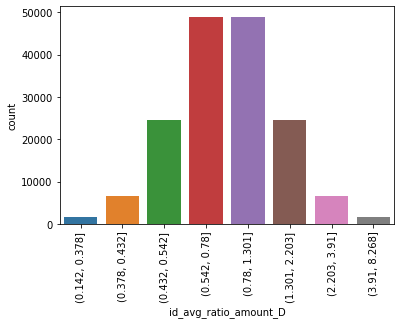

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="id_avg_ratio_amount_D", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


#### Thoughts: 
- We can see from the graph that the ratio that is higher than 2.2 could be considered high ratio, which means the amount is a lot higher than the average amount by provider id. So these transactions are suspicious. 

In [38]:
df[df['id_avg_ratio_amount']>2.2].head()


,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,...,Average_Total_Payments_D,Avg_Payment_ByStateDRG,state_drg_avg_ratio_amount,state_drg_avg_ratio_amount_D,med_Payment_ByStateDRG,state_drg_med_ratio_amount,state_drg_med_ratio_amount_D,avg_Payment_ById,id_avg_ratio_amount,id_avg_ratio_amount_D
2992,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,64,50882.40,...,"(41935.658, 156158.18]",16815.199189,3.025977,"(1.663, 7.858]",14898.680,3.415229,"(1.79, 9.339]",22679.052553,2.243586,"(2.203, 3.91]"
14948,177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W...,10054,PARKWAY MEDICAL CENTER,1874 BELTLINE RD SW,DECATUR,AL,35601,AL - Huntsville,12,15279.00,...,"(12538.0, 23926.526]",11894.352564,1.284559,"(1.102, 1.383]",11416.330,1.338346,"(1.153, 1.466]",6787.380750,2.251089,"(2.203, 3.91]"
15120,177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W...,50313,SUTTER TRACY COMMUNITY HOSPITAL,1420 N TRACY BLVD,TRACY,CA,95376,CA - Stockton,18,20918.33,...,"(12538.0, 23926.526]",18186.648023,1.150203,"(1.102, 1.383]",17344.315,1.206063,"(1.153, 1.466]",8653.588182,2.417301,"(2.203, 3.91]"
15642,177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W...,180021,PINEVILLE COMMUNITY HOSPITAL,850 RIVERVIEW AVENUE,PINEVILLE,KY,40977,TN - Knoxville,12,12286.66,...,"(7214.1, 12538.0]",12356.060000,0.994383,"(0.957, 1.102]",12286.660,1.000000,"(0.908, 1.0]",5448.521515,2.255045,"(2.203, 3.91]"
15975,177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W...,280125,FAITH REGIONAL HEALTH SERVICES,2700 WEST NORFOLK AVE,NORFOLK,NE,68701,NE - Omaha,12,22201.33,...,"(12538.0, 23926.526]",13539.248182,1.639776,"(1.383, 1.663]",11659.320,1.904170,"(1.79, 9.339]",9340.116136,2.376987,"(2.203, 3.91]"


#### Conclusion: 
- This feature compares the individual transaction to the average payment amount grouped by provider's id. If the ratio is high, we can say that the transaction is suspicious. Because the payment amount generally does not fluctuate that much for the same provider. So if the amount is abnormally high compared to the average, it can raise suspicions. 

### Feature 4: Ratio of median payment by Provider_Id

#### Thoughts:
- Here is the benchmark table created based on median payment grouped by provider id. We can use this table to generate our feature. 

In [39]:
benchmark = data.groupby(['Provider_Id'])['Average_Total_Payments'].median().reset_index()
benchmark.columns = ['Provider_Id','med_Payment_ById']
benchmark.head()

,Provider_Id,med_Payment_ById
0,10001,6577.240
1,10005,5933.950
2,10006,6148.055
3,10007,4072.535
4,10008,5213.910


In [40]:
# add the new feature average spending to the dataset 
df = pd.merge(df, benchmark, how='left', on=['Provider_Id'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df['id_med_ratio_amount'] = np.where(df['med_Payment_ById']==0,0, df['Average_Total_Payments'] / df['med_Payment_ById'])
df['id_med_ratio_amount'].describe()

count    163065.000000
mean          1.297521
std           0.913768
min           0.289939
25%           0.742804
50%           1.000000
75%           1.538342
max          27.137064
Name: id_med_ratio_amount, dtype: float64

In [41]:
# cut by percentile for plotting
var = 'id_med_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df[binned_var] = pd.qcut( df[var],percentile)
df[['id_med_ratio_amount_D']]

,id_med_ratio_amount_D
0,"(0.705, 1.0]"
1,"(0.705, 1.0]"
2,"(0.705, 1.0]"
3,"(0.705, 1.0]"
4,"(0.705, 1.0]"
...,...
163060,"(0.575, 0.705]"
163061,"(0.575, 0.705]"
163062,"(0.705, 1.0]"
163063,"(0.705, 1.0]"


[Text(0, 0, '(0.289, 0.506]'),
 Text(0, 0, '(0.506, 0.575]'),
 Text(0, 0, '(0.575, 0.705]'),
 Text(0, 0, '(0.705, 1.0]'),
 Text(0, 0, '(1.0, 1.693]'),
 Text(0, 0, '(1.693, 2.922]'),
 Text(0, 0, '(2.922, 5.242]'),
 Text(0, 0, '(5.242, 27.137]')]

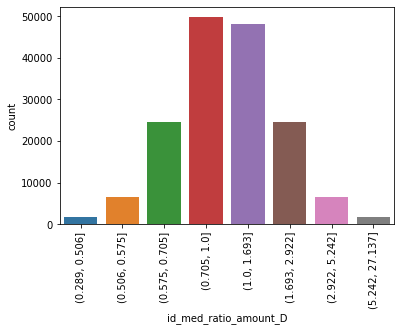

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="id_med_ratio_amount_D", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


#### Thoughts: 
- We can see from the graph that the ratio that is higher than 2.9 could be considered high ratio, which means the amount is a lot higher than the median amount by provider id. So these transactions are suspicious. 

In [43]:
df[df['id_med_ratio_amount']>2.9].head()


,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,...,state_drg_avg_ratio_amount_D,med_Payment_ByStateDRG,state_drg_med_ratio_amount,state_drg_med_ratio_amount_D,avg_Payment_ById,id_avg_ratio_amount,id_avg_ratio_amount_D,med_Payment_ById,id_med_ratio_amount,id_med_ratio_amount_D
2992,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,64,50882.40,...,"(1.663, 7.858]",14898.680,3.415229,"(1.79, 9.339]",22679.052553,2.243586,"(2.203, 3.91]",16215.785,3.137831,"(2.922, 5.242]"
15132,177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W...,50367,NORTHBAY MEDICAL CENTER,1200 B GALE WILSON BLVD,FAIRFIELD,CA,94533,CA - Contra Costa County,16,34775.68,...,"(1.663, 7.858]",17344.315,2.005019,"(1.79, 9.339]",16563.353934,2.099555,"(1.301, 2.203]",11731.140,2.964391,"(2.922, 5.242]"
15731,177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W...,210024,UNION MEMORIAL HOSPITAL,201 E UNIVERSITY PKY,BALTIMORE,MD,21218,MD - Baltimore,19,31090.00,...,"(1.663, 7.858]",17145.980,1.813253,"(1.79, 9.339]",14796.598556,2.101159,"(1.301, 2.203]",10583.080,2.937708,"(2.922, 5.242]"
15975,177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W...,280125,FAITH REGIONAL HEALTH SERVICES,2700 WEST NORFOLK AVE,NORFOLK,NE,68701,NE - Omaha,12,22201.33,...,"(1.383, 1.663]",11659.320,1.904170,"(1.79, 9.339]",9340.116136,2.376987,"(2.203, 3.91]",7567.480,2.933781,"(2.922, 5.242]"
16057,177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W...,330013,ALBANY MEDICAL CENTER HOSPITAL,43 NEW SCOTLAND AVENUE,ALBANY,NY,12208,NY - Albany,11,35689.27,...,"(1.663, 7.858]",15380.660,2.320399,"(1.79, 9.339]",12468.855263,2.862273,"(2.203, 3.91]",9297.310,3.838666,"(2.922, 5.242]"


#### Conclusion:
- This feature can assess if any provider causes irregularly high payments for patients that the insurance has to cover. If it is higher than median amount, it can be suspicious

### Feature 5: Ratio of Average_Medicare_Payment by Provider_State and DRG

#### Thoughts: 
- First, we are going to create a benchmark table, which is the data grouped by provider State and drug. This lays down the foundation for the feature creation. 

In [44]:
benchmark = data.groupby(['Provider_State', 'DRG'])['Average_Medicare_Payment'].mean().reset_index()
benchmark.columns = ['Provider_State','DRG','avg_Payment_ById1']
benchmark.head()

,Provider_State,DRG,avg_Payment_ById1
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,6413.780000
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8081.540000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,20555.255000
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,11140.963333
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,8258.427500


In [45]:
# add the new feature average spending to the dataset 
df = pd.merge(df, benchmark, how='left', on=['Provider_State', 'DRG'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df['state_drg_avg_ratio_amount'] = np.where(df['avg_Payment_ById1']==0,0, df['Average_Medicare_Payment'] / df['avg_Payment_ById1'])
df['state_drg_avg_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.215091
min           0.339831
25%           0.868395
50%           0.954250
75%           1.071483
max           5.174415
Name: state_drg_avg_ratio_amount, dtype: float64

In [46]:
# cut by percentile for plotting
var = 'state_drg_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df[binned_var] = pd.qcut( df[var],percentile)
df[['state_drg_avg_ratio_amount_D']]

,state_drg_avg_ratio_amount_D
0,"(0.954, 1.111]"
1,"(0.954, 1.111]"
2,"(0.954, 1.111]"
3,"(0.849, 0.954]"
4,"(0.954, 1.111]"
...,...
163060,"(0.757, 0.849]"
163061,"(0.655, 0.757]"
163062,"(0.954, 1.111]"
163063,"(1.744, 5.174]"


[Text(0, 0, '(0.339, 0.655]'),
 Text(0, 0, '(0.655, 0.757]'),
 Text(0, 0, '(0.757, 0.849]'),
 Text(0, 0, '(0.849, 0.954]'),
 Text(0, 0, '(0.954, 1.111]'),
 Text(0, 0, '(1.111, 1.43]'),
 Text(0, 0, '(1.43, 1.744]'),
 Text(0, 0, '(1.744, 5.174]')]

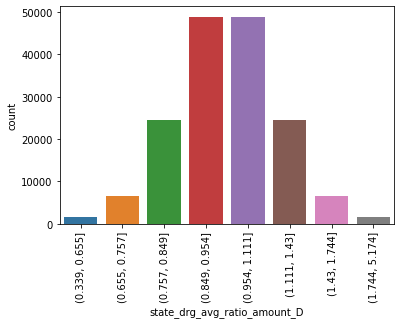

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="state_drg_avg_ratio_amount_D", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


#### Thoughts: 
- We can see from the graph that the ratio that is higher than 1.43 could be considered high ratio, which means the amount is a lot higher than the average medicare amount by provider state and drug. So these transactions are suspicious. 

In [48]:
df[df['state_drg_avg_ratio_amount']>1.43].head()


,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,...,med_Payment_ByStateDRG,state_drg_med_ratio_amount,state_drg_med_ratio_amount_D,avg_Payment_ById,id_avg_ratio_amount,id_avg_ratio_amount_D,med_Payment_ById,id_med_ratio_amount,id_med_ratio_amount_D,avg_Payment_ById1
31,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,30023,FLAGSTAFF MEDICAL CENTER,1200 NORTH BEAVER STREET,FLAGSTAFF,AZ,86001,AZ - Phoenix,15,11026.33,...,6959.89,1.584268,"(1.466, 1.79]",18241.015000,0.604480,"(0.542, 0.78]",12610.975,0.874344,"(0.705, 1.0]",5912.832917
59,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,40078,NATIONAL PARK MEDICAL CENTER,1910 MALVERN AVENUE,HOT SPRINGS,AR,71901,AR - Little Rock,18,9838.11,...,5890.00,1.670307,"(1.466, 1.79]",9305.617966,1.057223,"(0.78, 1.301]",7215.430,1.363482,"(1.0, 1.693]",4938.712500
73,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50058,GLENDALE MEM HOSPITAL & HLTH CENTER,1420 S CENTRAL AVE,GLENDALE,CA,91204,CA - Los Angeles,11,11082.18,...,7863.14,1.409384,"(1.153, 1.466]",15413.245286,0.719004,"(0.542, 0.78]",11230.680,0.986777,"(0.705, 1.0]",6878.954925
97,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50262,RONALD REAGAN UCLA MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,13,11899.76,...,7863.14,1.513360,"(1.466, 1.79]",22674.284203,0.524813,"(0.432, 0.542]",16087.600,0.739685,"(0.705, 1.0]",6878.954925
100,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50291,SUTTER MEDICAL CENTER OF SANTA ROSA,3325 CHANATE RD,SANTA ROSA,CA,95404,CA - Santa Rosa,17,10671.64,...,7863.14,1.357173,"(1.153, 1.466]",16463.370323,0.648205,"(0.542, 0.78]",12621.770,0.845495,"(0.705, 1.0]",6878.954925


#### Conclusion: 
- This feature compares the individual transaction to the average medicare payment amount grouped by provider's state and drug name. If the ratio is high, we can say that the transaction is suspicious. 
Because in the same state for the same drug, the price is more than likely to be similar. If the ratio indicates otherwise, it would be outliers.  

### Feature 6: Ratio of median Medicare_Payment by Provider_State and DRG

#### Thoughts: 
- First, we are going to create a benchmark table, which is the data grouped by provider id and drug. This lays down the foundation for the feature creation. 

In [49]:
benchmark = data.groupby(['Provider_State', 'DRG'])['Average_Medicare_Payment'].median().reset_index()
benchmark.columns = ['Provider_State','DRG','avg_Payment_ById5']
benchmark.head()

,Provider_State,DRG,avg_Payment_ById5
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,6413.780
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8081.540
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,20555.255
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10495.340
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,8372.925


In [50]:
# add the new feature average spending to the dataset 
df = pd.merge(df, benchmark, how='left', on=['Provider_State', 'DRG'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df['state_drg_med_ratio_amount'] = np.where(df['avg_Payment_ById5']==0,0, df['Average_Medicare_Payment'] / df['avg_Payment_ById5'])
df['state_drg_med_ratio_amount'].describe()

count    163065.000000
mean          1.055484
std           0.234139
min           0.367836
25%           0.916191
50%           1.000000
75%           1.121178
max           6.030981
Name: state_drg_med_ratio_amount, dtype: float64

In [51]:
# cut by percentile for plotting
var = 'state_drg_med_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df[binned_var] = pd.qcut( df[var],percentile)
df[['state_drg_med_ratio_amount_D']]

,state_drg_med_ratio_amount_D
0,"(1.0, 1.167]"
1,"(1.0, 1.167]"
2,"(0.897, 1.0]"
3,"(0.897, 1.0]"
4,"(1.0, 1.167]"
...,...
163060,"(0.805, 0.897]"
163061,"(0.714, 0.805]"
163062,"(1.167, 1.527]"
163063,"(1.898, 6.031]"


[Text(0, 0, '(0.367, 0.714]'),
 Text(0, 0, '(0.714, 0.805]'),
 Text(0, 0, '(0.805, 0.897]'),
 Text(0, 0, '(0.897, 1.0]'),
 Text(0, 0, '(1.0, 1.167]'),
 Text(0, 0, '(1.167, 1.527]'),
 Text(0, 0, '(1.527, 1.898]'),
 Text(0, 0, '(1.898, 6.031]')]

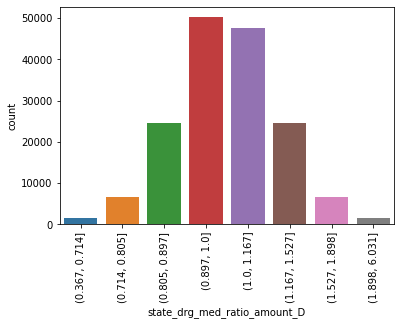

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="state_drg_med_ratio_amount_D", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


#### Thoughts: 
- We can see from the graph that the ratio that is higher than 1.527 could be considered high ratio, which means the amount is a lot higher than the median medicare amount by provider state and drug. So these transactions are suspicious. 

In [53]:
df[df['state_drg_med_ratio_amount']>1.527].head()


,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,...,state_drg_med_ratio_amount,state_drg_med_ratio_amount_D,avg_Payment_ById,id_avg_ratio_amount,id_avg_ratio_amount_D,med_Payment_ById,id_med_ratio_amount,id_med_ratio_amount_D,avg_Payment_ById1,avg_Payment_ById5
31,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,30023,FLAGSTAFF MEDICAL CENTER,1200 NORTH BEAVER STREET,FLAGSTAFF,AZ,86001,AZ - Phoenix,15,11026.33,...,1.597244,"(1.527, 1.898]",18241.015000,0.604480,"(0.542, 0.78]",12610.975,0.874344,"(0.705, 1.0]",5912.832917,5669.805
59,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,40078,NATIONAL PARK MEDICAL CENTER,1910 MALVERN AVENUE,HOT SPRINGS,AR,71901,AR - Little Rock,18,9838.11,...,1.852201,"(1.527, 1.898]",9305.617966,1.057223,"(0.78, 1.301]",7215.430,1.363482,"(1.0, 1.693]",4938.712500,4607.400
97,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50262,RONALD REAGAN UCLA MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,13,11899.76,...,1.648787,"(1.527, 1.898]",22674.284203,0.524813,"(0.432, 0.542]",16087.600,0.739685,"(0.705, 1.0]",6878.954925,6639.330
114,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,27,12396.29,...,1.729602,"(1.527, 1.898]",24354.784138,0.508988,"(0.432, 0.542]",16617.430,0.745981,"(0.705, 1.0]",6878.954925,6639.330
202,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,100113,SHANDS HOSPITAL AT THE UNIVERSITY OF FLORIDA,1600 SW ARCHER RD,GAINESVILLE,FL,32610,FL - Gainesville,17,9370.64,...,1.614064,"(1.527, 1.898]",14399.515106,0.650761,"(0.542, 0.78]",10950.485,0.855728,"(0.705, 1.0]",4868.594568,4701.500


#### Conclusion: 
- This feature compares the individual transaction to the median medicare payment amount grouped by provider's state and drug name. If the ratio is high, we can say that the transaction is suspicious. 

### Feature 7: Ratio of average payment by Provider_City and DRG

#### Thoughts: 
- First we created the benchmark table, the average of payments grouped by city and drug.
- Then we proceed to merge the benchmark with the original table to get the individual transaction data. 
- After we get the ratio, we would be able to draw some conclusions regarding the outliers. 

In [54]:
benchmark = data.groupby(['Provider_City','DRG'])['Average_Total_Payments'].mean().reset_index()
benchmark.columns = ['Provider_City','DRG','Avg_Payment_ByStateDRG1']
benchmark.head()

,Provider_City,DRG,Avg_Payment_ByStateDRG1
0,ABBEVILLE,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,NaN
1,ABBEVILLE,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,NaN
2,ABBEVILLE,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
3,ABBEVILLE,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
4,ABBEVILLE,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN


In [55]:
# add the new feature average spending to the dataset 
df = pd.merge(df, benchmark, how='left', on=['Provider_City', 'DRG'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df['city_drg_avg_ratio_amount'] = np.where(df['Avg_Payment_ByStateDRG1']==0,0, df['Average_Total_Payments'] / df['Avg_Payment_ByStateDRG1'])
df['city_drg_avg_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.107658
min           0.238195
25%           0.982486
50%           1.000000
75%           1.000000
max           3.753099
Name: city_drg_avg_ratio_amount, dtype: float64

In [56]:
# cut by percentile for plotting
var = 'city_drg_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df[binned_var] = pd.qcut( df[var],percentile)
df[['city_drg_avg_ratio_amount_D']]

,city_drg_avg_ratio_amount_D
0,"(1.02, 1.186]"
1,"(0.956, 1.0]"
2,"(0.828, 0.956]"
3,"(0.828, 0.956]"
4,"(0.956, 1.0]"
...,...
163060,"(0.956, 1.0]"
163061,"(0.828, 0.956]"
163062,"(0.956, 1.0]"
163063,"(0.956, 1.0]"


[Text(0, 0, '(0.237, 0.727]'),
 Text(0, 0, '(0.727, 0.828]'),
 Text(0, 0, '(0.828, 0.956]'),
 Text(0, 0, '(0.956, 1.0]'),
 Text(0, 0, '(1.0, 1.02]'),
 Text(0, 0, '(1.02, 1.186]'),
 Text(0, 0, '(1.186, 1.381]'),
 Text(0, 0, '(1.381, 3.753]')]

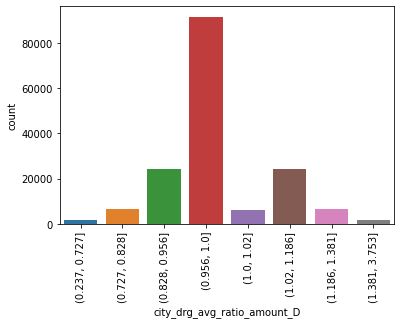

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="city_drg_avg_ratio_amount_D", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


#### Thoughts:
- We can see from the graph that the ratio that is higher than 1.38 could be considered high ratio, which means the amount is a lot higher than the average amount by city and drug. So these transactions are suspicious. 
- However, for the same city, the ratio mostly falls in the (0.828, 0.956] range. So anything higher than that can actually be suspicious. 

In [58]:
df[df['city_drg_avg_ratio_amount']>1.38].head()


,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,...,id_avg_ratio_amount,id_avg_ratio_amount_D,med_Payment_ById,id_med_ratio_amount,id_med_ratio_amount_D,avg_Payment_ById1,avg_Payment_ById5,Avg_Payment_ByStateDRG1,city_drg_avg_ratio_amount,city_drg_avg_ratio_amount_D
245,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,110010,EMORY UNIVERSITY HOSPITAL,"1364 CLIFTON ROAD, NE",ATLANTA,GA,30322,GA - Atlanta,26,9719.03,...,0.808126,"(0.78, 1.301]",9573.66,1.015184,"(1.0, 1.693]",5134.785517,5163.600,6898.576667,1.408846,"(1.381, 3.753]"
294,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,140080,RHC ST FRANCIS HOSPITAL,355 RIDGE AVE,EVANSTON,IL,60202,IL - Evanston,12,17347.00,...,1.384055,"(1.301, 2.203]",9170.01,1.891710,"(1.693, 2.922]",5386.302885,5264.365,12472.530000,1.390816,"(1.381, 3.753]"
347,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,150056,INDIANA UNIVERSITY HEALTH,1701 N SENATE BLVD,INDIANAPOLIS,IN,46206,IN - Indianapolis,82,9764.93,...,0.670824,"(0.542, 0.78]",10954.46,0.891411,"(0.705, 1.0]",4972.062432,4841.170,6730.840000,1.450774,"(1.381, 3.753]"
456,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,JOHNS HOPKINS BAYVIEW MEDICAL CENTER,4940 EASTERN AVENUE,BALTIMORE,MD,21224,MD - Baltimore,11,16878.45,...,1.117093,"(0.78, 1.301]",11093.60,1.521458,"(1.0, 1.693]",8015.386190,7340.710,10610.324286,1.590757,"(1.381, 3.753]"
544,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,250001,UNIVERSITY OF MISSISSIPPI MED CENTER,2500 N STATE ST,JACKSON,MS,39216,MS - Jackson,11,10017.36,...,0.735898,"(0.542, 0.78]",9649.12,1.038163,"(1.0, 1.693]",5020.212667,5061.070,6713.945000,1.492023,"(1.381, 3.753]"


#### Conclusion:
- This feature calculates the ratio of the individual payment to the average payment grouped by provider city and drug name. For the high ratio samples, we can say that the transaction is suspicious because in the same city for the same drug, the price is more than likely to be similar. If the ratio indicates otherwise, it would be outliers.

### Feature 8: Ratio of median payment by Provider_City and DRG

#### Thoughts: 
- First we created the benchmark table, the average of payments grouped by city and drug.
- Then we proceed to merge the benchmark with the original table to get the individual transaction data. 
- After we get the ratio, we would be able to draw some conclusions regarding the outliers. 

In [59]:
benchmark = data.groupby(['Provider_City','DRG'])['Average_Total_Payments'].median().reset_index()
benchmark.columns = ['Provider_City','DRG','Avg_Payment_ByStateDRG2']
benchmark.head()

,Provider_City,DRG,Avg_Payment_ByStateDRG2
0,ABBEVILLE,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,NaN
1,ABBEVILLE,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,NaN
2,ABBEVILLE,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
3,ABBEVILLE,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
4,ABBEVILLE,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN


In [60]:
# add the new feature average spending to the dataset 
df = pd.merge(df, benchmark, how='left', on=['Provider_City', 'DRG'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df['city_drg_med_ratio_amount'] = np.where(df['Avg_Payment_ByStateDRG2']==0,0, df['Average_Total_Payments'] / df['Avg_Payment_ByStateDRG2'])
df['city_drg_med_ratio_amount'].describe()

count    163065.000000
mean          1.011287
std           0.120431
min           0.238195
25%           1.000000
50%           1.000000
75%           1.000000
max           5.591943
Name: city_drg_med_ratio_amount, dtype: float64

In [61]:
# cut by percentile for plotting
var = 'city_drg_med_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df[binned_var] = pd.qcut( df[var],percentile)
df[['city_drg_med_ratio_amount_D']]

,city_drg_med_ratio_amount_D
0,"(1.019, 1.212]"
1,"(0.982, 1.0]"
2,"(0.735, 0.853]"
3,"(0.853, 0.982]"
4,"(0.982, 1.0]"
...,...
163060,"(0.982, 1.0]"
163061,"(0.853, 0.982]"
163062,"(0.982, 1.0]"
163063,"(0.982, 1.0]"


[Text(0, 0, '(0.237, 0.735]'),
 Text(0, 0, '(0.735, 0.853]'),
 Text(0, 0, '(0.853, 0.982]'),
 Text(0, 0, '(0.982, 1.0]'),
 Text(0, 0, '(1.0, 1.019]'),
 Text(0, 0, '(1.019, 1.212]'),
 Text(0, 0, '(1.212, 1.499]'),
 Text(0, 0, '(1.499, 5.592]')]

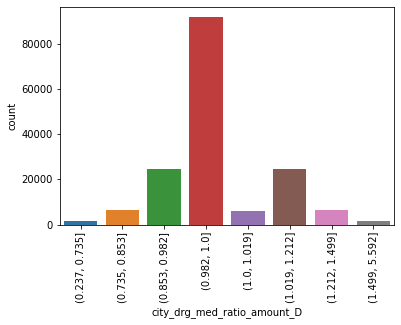

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="city_drg_med_ratio_amount_D", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


#### Thoughts:
- We can see from the graph that the ratio that is higher than 1.21 could be considered high ratio, which means the amount is a lot higher than the median amount by city and drug. So these transactions are suspicious. 
- However, for the same city, the ratio mostly falls in the (0.982, 1.0] range. So anything higher than that can actually be suspicious. 

In [63]:
df[df['city_drg_med_ratio_amount']>1.21].head()


,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,...,id_med_ratio_amount,id_med_ratio_amount_D,avg_Payment_ById1,avg_Payment_ById5,Avg_Payment_ByStateDRG1,city_drg_avg_ratio_amount,city_drg_avg_ratio_amount_D,Avg_Payment_ByStateDRG2,city_drg_med_ratio_amount,city_drg_med_ratio_amount_D
7,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,32,8031.12,...,0.932354,"(0.705, 1.0]",4599.593043,4471.68,5919.483333,1.356727,"(1.186, 1.381]",5563.935,1.443424,"(1.212, 1.499]"
59,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,40078,NATIONAL PARK MEDICAL CENTER,1910 MALVERN AVENUE,HOT SPRINGS,AR,71901,AR - Little Rock,18,9838.11,...,1.363482,"(1.0, 1.693]",4938.712500,4607.40,7822.260000,1.257707,"(1.186, 1.381]",7822.260,1.257707,"(1.212, 1.499]"
71,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50056,ANTELOPE VALLEY HOSPITAL MED CENTER,1600 W AVE J,LANCASTER,CA,93534,CA - Los Angeles,15,8333.86,...,0.878622,"(0.705, 1.0]",6878.954925,6639.33,6865.356667,1.213901,"(1.186, 1.381]",6225.170,1.338736,"(1.212, 1.499]"
73,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50058,GLENDALE MEM HOSPITAL & HLTH CENTER,1420 S CENTRAL AVE,GLENDALE,CA,91204,CA - Los Angeles,11,11082.18,...,0.986777,"(0.705, 1.0]",6878.954925,6639.33,8345.080000,1.327990,"(1.186, 1.381]",7046.000,1.572833,"(1.499, 5.592]"
202,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,100113,SHANDS HOSPITAL AT THE UNIVERSITY OF FLORIDA,1600 SW ARCHER RD,GAINESVILLE,FL,32610,FL - Gainesville,17,9370.64,...,0.855728,"(0.705, 1.0]",4868.594568,4701.50,7263.350000,1.290126,"(1.186, 1.381]",6513.190,1.438717,"(1.212, 1.499]"


#### Conclusion:
- This feature calculates the ratio of the individual payment to the median payment grouped by provider city and drug name. For the high ratio samples, we can say that the transaction is suspicious because in the same city for the same drug, the price is more than likely to be similar. If the ratio indicates otherwise, it would be outliers.

### Feature 9: Ratio of average medicare payment by Provider_City and DRG

#### Thoughts: 
- First, we are going to create a benchmark table, which is the data grouped by provider State and drug. This lays down the foundation for the feature creation. 

In [64]:
benchmark = data.groupby(['Provider_City', 'DRG'])['Average_Medicare_Payment'].mean().reset_index()
benchmark.columns = ['Provider_City','DRG','avg_Payment_ById3']
benchmark.head()

,Provider_City,DRG,avg_Payment_ById3
0,ABBEVILLE,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,NaN
1,ABBEVILLE,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,NaN
2,ABBEVILLE,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
3,ABBEVILLE,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
4,ABBEVILLE,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN


In [65]:
# add the new feature average spending to the dataset 
df = pd.merge(df, benchmark, how='left', on=['Provider_City', 'DRG'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df['City_drg_avg_ratio_amount'] = np.where(df['avg_Payment_ById3']==0,0, df['Average_Medicare_Payment'] / df['avg_Payment_ById3'])
df['City_drg_avg_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.119402
min           0.261737
25%           0.979755
50%           1.000000
75%           1.000000
max           3.846861
Name: City_drg_avg_ratio_amount, dtype: float64

In [66]:
# cut by percentile for plotting
var = 'City_drg_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df[binned_var] = pd.qcut( df[var],percentile)
df[['City_drg_avg_ratio_amount_D']]

,City_drg_avg_ratio_amount_D
0,"(1.023, 1.21]"
1,"(0.95, 1.0]"
2,"(0.809, 0.95]"
3,"(0.809, 0.95]"
4,"(0.95, 1.0]"
...,...
163060,"(0.95, 1.0]"
163061,"(0.261, 0.7]"
163062,"(0.95, 1.0]"
163063,"(0.95, 1.0]"


[Text(0, 0, '(0.261, 0.7]'),
 Text(0, 0, '(0.7, 0.809]'),
 Text(0, 0, '(0.809, 0.95]'),
 Text(0, 0, '(0.95, 1.0]'),
 Text(0, 0, '(1.0, 1.023]'),
 Text(0, 0, '(1.023, 1.21]'),
 Text(0, 0, '(1.21, 1.435]'),
 Text(0, 0, '(1.435, 3.847]')]

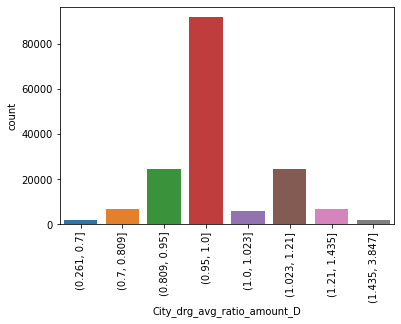

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="City_drg_avg_ratio_amount_D", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


#### Thoughts: 
- We can see from the graph that the ratio that is higher than 1.21 could be considered high ratio, which means the amount is a lot higher than the average medicare amount by provider city and drug. So these transactions are suspicious. 

In [68]:
df[df['City_drg_avg_ratio_amount']>1.21].head()


,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,...,avg_Payment_ById5,Avg_Payment_ByStateDRG1,city_drg_avg_ratio_amount,city_drg_avg_ratio_amount_D,Avg_Payment_ByStateDRG2,city_drg_med_ratio_amount,city_drg_med_ratio_amount_D,avg_Payment_ById3,City_drg_avg_ratio_amount,City_drg_avg_ratio_amount_D
7,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,32,8031.12,...,4471.68,5919.483333,1.356727,"(1.186, 1.381]",5563.935,1.443424,"(1.212, 1.499]",4592.038333,1.275795,"(1.21, 1.435]"
59,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,40078,NATIONAL PARK MEDICAL CENTER,1910 MALVERN AVENUE,HOT SPRINGS,AR,71901,AR - Little Rock,18,9838.11,...,4607.40,7822.260000,1.257707,"(1.186, 1.381]",7822.260,1.257707,"(1.212, 1.499]",6646.765000,1.283907,"(1.21, 1.435]"
73,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50058,GLENDALE MEM HOSPITAL & HLTH CENTER,1420 S CENTRAL AVE,GLENDALE,CA,91204,CA - Los Angeles,11,11082.18,...,6639.33,8345.080000,1.327990,"(1.186, 1.381]",7046.000,1.572833,"(1.499, 5.592]",7391.853333,1.360417,"(1.21, 1.435]"
117,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50496,JOHN MUIR MEDICAL CENTER - CONCORD CAMPUS,2540 EAST ST,CONCORD,CA,94520,CA - Contra Costa County,20,8485.00,...,6639.33,6967.555000,1.217787,"(1.186, 1.381]",7012.560,1.209972,"(1.019, 1.212]",5687.770000,1.333141,"(1.21, 1.435]"
202,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,100113,SHANDS HOSPITAL AT THE UNIVERSITY OF FLORIDA,1600 SW ARCHER RD,GAINESVILLE,FL,32610,FL - Gainesville,17,9370.64,...,4701.50,7263.350000,1.290126,"(1.186, 1.381]",6513.190,1.438717,"(1.212, 1.499]",5657.723333,1.341267,"(1.21, 1.435]"


#### Conclusion: 
- This feature compares the individual transaction to the average medicare payment amount grouped by provider's city and drug name. If the ratio is high, we can say that the transaction is suspicious. 
Because in the same city for the same drug, the price is more than likely to be similar. If the ratio indicates otherwise, it would be outliers.  

### Feature 10: Ratio of average total discharges by Provider_Id 

#### Thoughts: 
- First, we are going to create a benchmark table, which is the total discharges grouped by provider id. This lays down the foundation for the feature creation. 

In [69]:
benchmark = data.groupby(['Provider_Id'])['Total_Discharges'].mean().reset_index()
benchmark.columns = ['Provider_Id','avg_Discharges_ById']
benchmark.head()

,Provider_Id,avg_Discharges_ById
0,10001,58.750000
1,10005,28.959184
2,10006,45.360465
3,10007,27.409091
4,10008,17.888889


In [70]:
# add the new feature average spending to the dataset 
df = pd.merge(df, benchmark, how='left', on=['Provider_Id'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df['id_avg_Discharges_ratio_amount'] = np.where(df['avg_Discharges_ById']==0,0, df['Total_Discharges'] / df['avg_Discharges_ById'])
df['id_avg_Discharges_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.911221
min           0.028311
25%           0.471464
50%           0.717822
75%           1.217992
max          24.966011
Name: id_avg_Discharges_ratio_amount, dtype: float64

In [71]:
# cut by percentile for plotting
var = 'id_avg_Discharges_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df[binned_var] = pd.qcut( df[var],percentile)
df[['id_avg_Discharges_ratio_amount_D']]

,id_avg_Discharges_ratio_amount_D
0,"(1.395, 2.541]"
1,"(0.432, 0.718]"
2,"(0.432, 0.718]"
3,"(0.718, 1.395]"
4,"(0.432, 0.718]"
...,...
163060,"(0.718, 1.395]"
163061,"(0.297, 0.432]"
163062,"(0.718, 1.395]"
163063,"(0.297, 0.432]"


[Text(0, 0, '(0.027299999999999998, 0.217]'),
 Text(0, 0, '(0.217, 0.297]'),
 Text(0, 0, '(0.297, 0.432]'),
 Text(0, 0, '(0.432, 0.718]'),
 Text(0, 0, '(0.718, 1.395]'),
 Text(0, 0, '(1.395, 2.541]'),
 Text(0, 0, '(2.541, 4.458]'),
 Text(0, 0, '(4.458, 24.966]')]

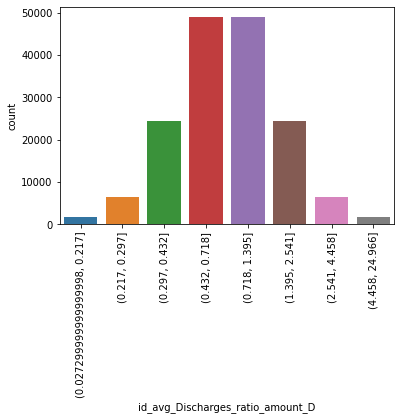

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="id_avg_Discharges_ratio_amount_D", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


#### Thoughts: 
- We can see from the graph that the ratio that is higher than 2.541 could be considered high ratio, which means the total discharges is a lot higher than the average amount of total discharges grouped by provider id. So these transactions are suspicious. 

In [73]:
df[df['id_avg_Discharges_ratio_amount']>2.541].head()


,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,...,city_drg_avg_ratio_amount_D,Avg_Payment_ByStateDRG2,city_drg_med_ratio_amount,city_drg_med_ratio_amount_D,avg_Payment_ById3,City_drg_avg_ratio_amount,City_drg_avg_ratio_amount_D,avg_Discharges_ById,id_avg_Discharges_ratio_amount,id_avg_Discharges_ratio_amount_D
394,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,170186,KANSAS HEART HOSPITAL,3601 NORTH WEBB ROAD,WICHITA,KS,67226,KS - Wichita,190,5332.51,...,"(0.828, 0.956]",5805.485,0.918530,"(0.853, 0.982]",4776.6925,0.902514,"(0.809, 0.95]",41.450000,4.583836,"(4.458, 24.966]"
439,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,190250,"LOUISIANA MEDICAL CENTER AND HEART HOSPITAL, LLC",64030 HIGHWAY 434,LACOMBE,LA,70445,LA - Slidell,48,5411.83,...,"(0.956, 1.0]",5411.830,1.000000,"(0.982, 1.0]",4475.1600,1.000000,"(0.95, 1.0]",18.538462,2.589212,"(2.541, 4.458]"
440,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,190263,HEART HOSPITAL OF LAFAYETTE,1105 KALISTE SALOOM ROAD,LAFAYETTE,LA,70508,LA - Lafayette,110,5348.60,...,"(0.727, 0.828]",6559.860,0.815353,"(0.735, 0.853]",4677.3300,0.879775,"(0.809, 0.95]",30.869565,3.563380,"(2.541, 4.458]"
603,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,280128,NEBRASKA HEART HOSPITAL,7500 SOUTH 91ST ST,LINCOLN,NE,68526,NE - Lincoln,125,5519.41,...,"(0.828, 0.956]",6028.455,0.915560,"(0.853, 0.982]",4685.5350,0.959453,"(0.95, 1.0]",46.400000,2.693966,"(2.541, 4.458]"
981,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450851,BAYLOR HEART AND VASCULAR HOSPITAL,621 NORTH HALL STREET,DALLAS,TX,75226,TX - Dallas,99,6028.77,...,"(0.828, 0.956]",6789.710,0.887927,"(0.853, 0.982]",5555.5875,0.857623,"(0.809, 0.95]",38.869565,2.546980,"(2.541, 4.458]"


#### Conclusion: 
- This feature compares the individual discharges to the average amount of discharges grouped by provider's id. If the ratio is high, we can say that the transaction is suspicious. Discharges means that A hospital will discharge you when you no longer need to receive inpatient care and can go home. Or, a hospital will discharge you to send you to another type of facility. We can compare if the number of discharges by each provider is different to determine if suspicisous. 

## Histogram Based Outlier Scores

- HBOS starts by constructing a histogram for a variable. The height of the bin where the data point is located determines the outlier score. For normal data, we want a small outlier score and a large score for outliers, so we can inverse a bin's height to determine an outlier score for a data point. Each histogram's maximum height is normalized to one. It ensures equal weight for all univariate univariate scores.

In [248]:
df.columns

Index(['DRG', 'Provider_Id', 'Provider_Name', 'Provider_StreetAddress',
       'Provider_City', 'Provider_State', 'Provider_Zipcode',
       'Hospital_referral_region_desp', 'Total_Discharges',
       'Average_Total_Payments', 'Average_Medicare_Payment',
       'Average_Total_Payments_D', 'Avg_Payment_ByStateDRG',
       'state_drg_avg_ratio_amount', 'state_drg_avg_ratio_amount_D',
       'med_Payment_ByStateDRG', 'state_drg_med_ratio_amount',
       'state_drg_med_ratio_amount_D', 'avg_Payment_ById',
       'id_avg_ratio_amount', 'id_avg_ratio_amount_D', 'med_Payment_ById',
       'id_med_ratio_amount', 'id_med_ratio_amount_D', 'avg_Payment_ById1',
       'avg_Payment_ById5', 'Avg_Payment_ByStateDRG1',
       'city_drg_avg_ratio_amount', 'city_drg_avg_ratio_amount_D',
       'Avg_Payment_ByStateDRG2', 'city_drg_med_ratio_amount',
       'city_drg_med_ratio_amount_D', 'avg_Payment_ById3',
       'City_drg_avg_ratio_amount', 'City_drg_avg_ratio_amount_D',
       'avg_Discharges_ById', '

In [76]:
features = ['state_drg_avg_ratio_amount', 
       'state_drg_med_ratio_amount', 
       'id_avg_ratio_amount', 
       'id_med_ratio_amount', 'city_drg_avg_ratio_amount',
       'city_drg_med_ratio_amount',
       'City_drg_avg_ratio_amount',
       'id_avg_Discharges_ratio_amount']

In [77]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(
df[features], test_size=0.2, random_state=42)

In [251]:

from pyod.models.hbos import HBOS
n_bins = 50
hbos = HBOS(n_bins=n_bins)
hbos.fit(X_train)
HBOS(alpha=0.1, contamination=0.1, n_bins=n_bins, tol=0.5)
y_train_scores = hbos.decision_function(X_train)

In [252]:

y_test_pred = hbos.predict(X_test) # outlier labels (0 or 1)
# Because it is '0' and '1', we can run a count statistic. 
unique, counts = np.unique(y_test_pred, return_counts=True)
dict(zip(unique, counts))
# And you can generate the anomaly score using clf.decision_function:
y_test_scores = hbos.decision_function(X_test)

- A high anomaly score means more abnormal. The histogram below shows there are outliers. If we choose 15 to be the cut point, we can suggest those >=15 to be outliers

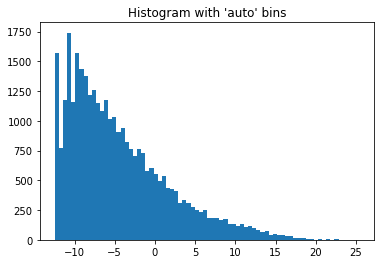

In [253]:

import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [254]:

# Let's see how many '0's and '1's.
df_test = pd.DataFrame(X_test)
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<15, 0, 1)
df_test['cluster'].value_counts()
# Now let's show the summary statistics:
df_test.groupby('cluster').mean()

,state_drg_avg_ratio_amount,state_drg_med_ratio_amount,id_avg_ratio_amount,id_med_ratio_amount,city_drg_avg_ratio_amount,city_drg_med_ratio_amount,City_drg_avg_ratio_amount,id_avg_Discharges_ratio_amount,score
cluster,,,,,,,,,
0,0.992979,1.047726,0.994304,1.288593,0.996618,1.006817,0.995916,1.000060,-4.628634
1,1.743670,1.861735,1.740537,2.429190,1.424510,1.542762,1.454228,1.243512,17.151236


In [255]:
X_test = X_test[features]

- In our case we have eight features. The average anomaly score in Cluster 1 is much higher than that of Cluster 0. The summary statistics also show dramatic differences between the two clusters. We thus believe the data points in Cluster 1 could be anomalous and deserve further inspection.

In [256]:

from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
# Standardize data
X_train_norm, X_test_norm = standardizer(X_train, X_test)

# Test a range of bins
n_clf = 3
k_list = [5,10,20]
# Just prepare data frames so we can store the model results
train_scores = np.zeros([X_train.shape[0], n_clf])
test_scores = np.zeros([X_test.shape[0], n_clf])
train_scores.shape
# Modeling
for i in range(n_clf):
    k = k_list[i]
    hbos = HBOS(n_bins=k)
    hbos.fit(X_train_norm)

    # Store the results in each column:
    train_scores[:, i] = hbos.decision_scores_
    test_scores[:, i] = hbos.decision_function(X_test_norm) 
# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

### Average

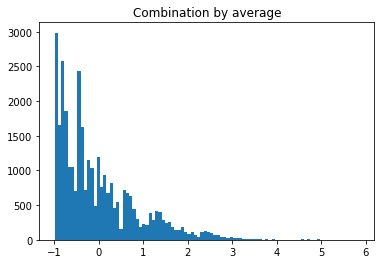

In [257]:

# Combination by average
# The test_scores_norm is 500 x 10. The "average" function will take the average of the 10 columns. The result "y_by_average" is a single column: 
y_by_average = average(test_scores_norm)
import matplotlib.pyplot as plt
plt.hist(y_by_average, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [258]:

df_test = pd.DataFrame(X_test)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<3, 0, 1)
df_test['y_by_average_cluster'].value_counts()

0    32360
1      253
Name: y_by_average_cluster, dtype: int64

In [259]:
df_test.groupby("y_by_average_cluster").mean()


,state_drg_avg_ratio_amount,state_drg_med_ratio_amount,id_avg_ratio_amount,id_med_ratio_amount,city_drg_avg_ratio_amount,city_drg_med_ratio_amount,City_drg_avg_ratio_amount,id_avg_Discharges_ratio_amount,y_by_average_score
y_by_average_cluster,,,,,,,,,
0,0.994109,1.048913,0.988213,1.280251,0.997535,1.007952,0.997029,1.001271,-0.034154
1,1.560596,1.668044,2.481224,3.437541,1.285187,1.369979,1.288284,1.076135,3.613656


- If we select 3 as a cut off point to cluster, any score higher than 3 would be considered anomalies. In this case, we have 253 anomalies in cluster 1. This can be further proven by higher values of all the features in cluster 1. 

### Maximum of Maximum

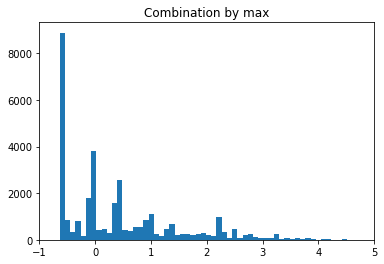

In [260]:

# Combination by mom
y_by_maximization = maximization(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_maximization, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by max")
plt.xlim(-1, 5)
plt.show()

In [261]:
df_test = pd.DataFrame(X_test)
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score']<3, 0, 1)
df_test['y_by_maximization_cluster'].value_counts()

0    31744
1      869
Name: y_by_maximization_cluster, dtype: int64

- First, we aggregate the scores of our models by maximum of maximum to see the difference in maximum scores in two clusters. Then, we made histogram plot to visualize the distribution of the scores. In our case it identifies 869 data points that have the outlier scores higher than 3. In order to get the summary statistics for each cluster, we do the following code, which produces the maximum values as below.

In [262]:
df_test.groupby('y_by_maximization_cluster').mean()


,state_drg_avg_ratio_amount,state_drg_med_ratio_amount,id_avg_ratio_amount,id_med_ratio_amount,city_drg_avg_ratio_amount,city_drg_med_ratio_amount,City_drg_avg_ratio_amount,id_avg_Discharges_ratio_amount,y_by_average_score,y_by_average_cluster,y_by_maximization_score
y_by_maximization_cluster,,,,,,,,,,,
0,0.989848,1.044431,0.96214,1.244302,0.996454,1.006169,0.995696,1.002353,-0.082993,0.000000,0.313734
1,1.314673,1.392872,2.37530,3.221511,1.120777,1.178473,1.130513,0.983545,2.811938,0.291139,3.608786


- In our case we have ten features. A high value in all features means abnormal, since all of our features indicate the ratio of spending compared to average or median. The summary statistics show the maximum anomaly score of Cluster 0 is smaller than that of Cluster 1, indicating Cluster 1 to be the anomaly group. This is confirmed by the fact that all features have higher means in Cluster 0. So here we can briefly conclude that the data points in cluster 1 are anomalies by the method of MoM. 

### The Average of Maximum

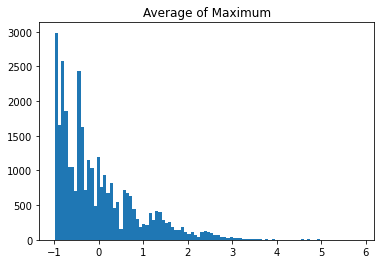

In [263]:
# Combination by aom
y_by_aom = aom(test_scores_norm, n_buckets=3)
             
import matplotlib.pyplot as plt
plt.hist(y_by_aom, bins='auto')  # arguments are passed to np.histogram
plt.title("Average of Maximum")
plt.show()

In [264]:

df_test = pd.DataFrame(X_test)
df_test['y_by_aom_score'] = y_by_aom
df_test['y_by_aom_cluster'] = np.where(df_test['y_by_aom_score']<2, 0, 1)
df_test['y_by_aom_cluster'].value_counts()

0    31328
1     1285
Name: y_by_aom_cluster, dtype: int64

- First, we aggregate the scores of our models by average of maximum to see the difference in average of maximum scores in two clusters. Then, we made histogram plot to visualize the distribution of the scores. In our case it identifies 1285 data points that have the outlier scores higher than 2. In order to get the summary statistics for each cluster, we do the following code, which produces the average of maximum values as below.

In [265]:
df_test.groupby('y_by_aom_cluster').mean()


,state_drg_avg_ratio_amount,state_drg_med_ratio_amount,id_avg_ratio_amount,id_med_ratio_amount,city_drg_avg_ratio_amount,city_drg_med_ratio_amount,City_drg_avg_ratio_amount,id_avg_Discharges_ratio_amount,y_by_average_score,y_by_average_cluster,y_by_maximization_score,y_by_maximization_cluster,y_by_aom_score
y_by_aom_cluster,,,,,,,,,,,,,
0,0.984314,1.038546,0.956831,1.236763,0.993029,1.001856,0.991920,1.001919,-0.115407,0.000000,0.282456,0.000862,-0.115407
1,1.344451,1.423544,2.047253,2.765211,1.164041,1.227853,1.178934,1.000217,2.664994,0.196887,3.304615,0.655253,2.664994


- In our case we have ten features. A high value in all features means abnormal, since all of our features indicate the ratio of spending compared to average or median. The summary statistics show the Average of maximum anomaly score of Cluster 0 is smaller than that of Cluster 1, indicating Cluster 1 to be the anomaly group. This is confirmed by the fact that all features have higher means in Cluster 0. So here we can briefly conclude that the data points in cluster 1 are anomalies by the method of AoM. 

### Maximum of Average

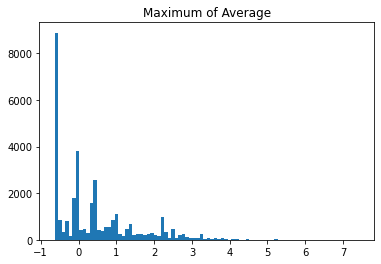

In [266]:

# Combination by moa
y_by_moa = moa(test_scores_norm, n_buckets=3)

import matplotlib.pyplot as plt
plt.hist(y_by_moa, bins='auto')  # arguments are passed to np.histogram
plt.title("Maximum of Average")

plt.show()

In [267]:
df_test = pd.DataFrame(X_test)
df_test['y_by_moa_score'] = y_by_moa
df_test['y_by_moa_cluster'] = np.where(df_test['y_by_moa_score']<2, 0, 1)
df_test['y_by_moa_cluster'].value_counts()

0    28837
1     3776
Name: y_by_moa_cluster, dtype: int64

In [268]:
df_test.groupby('y_by_moa_cluster').mean()


,state_drg_avg_ratio_amount,state_drg_med_ratio_amount,id_avg_ratio_amount,id_med_ratio_amount,city_drg_avg_ratio_amount,city_drg_med_ratio_amount,City_drg_avg_ratio_amount,id_avg_Discharges_ratio_amount,y_by_average_score,y_by_average_cluster,y_by_maximization_score,y_by_maximization_cluster,y_by_aom_score,y_by_aom_cluster,y_by_moa_score
y_by_moa_cluster,,,,,,,,,,,,,,,
0,0.975006,1.028712,0.850819,1.092652,0.988234,0.996859,0.986338,1.008847,-0.251643,0.000000,0.104585,0.000000,-0.251643,0.000000,0.104585
1,1.177957,1.244665,2.137513,2.857473,1.087843,1.116928,1.098190,0.948434,1.871201,0.067002,2.669302,0.230138,1.871201,0.340307,2.669302


- In our case we have ten features. A high value in all features means abnormal, since all of our features indicate the ratio of spending compared to average or median. The summary statistics show the Maximum of Average anomaly score of Cluster 0 is smaller than that of Cluster 1, indicating Cluster 1 to be the anomaly group. This is confirmed by the fact that all features have higher maximum of averge score in Cluster 0. So here we can briefly conclude that the data points in cluster 1 are anomalies by the method of MoA. 

## Section 4 PCA <a class="anchor" id="3"></a>


- A PCA will reduce the dimensionality of the original data and construct a subspace generated by eigenvectors of which each represents the (next) highest variance to explain the data.

- The PCA-Based Anomaly Detection component solves the anomaly detection problems by analyzing available features to determine what constitutes a "normal" class. The component then applies distance metrics to identify cases that represent anomalies. This approach lets us train a model by using existing imbalanced data.

- For anomaly detection, each new input is analyzed. The anomaly detection algorithm computes its projection on the eigenvectors, together with a normalized reconstruction error. The normalized error is used as the anomaly score. The higher the error, the more anomalous the instance is. (Microsoft)

In [74]:
df.columns

Index(['DRG', 'Provider_Id', 'Provider_Name', 'Provider_StreetAddress',
       'Provider_City', 'Provider_State', 'Provider_Zipcode',
       'Hospital_referral_region_desp', 'Total_Discharges',
       'Average_Total_Payments', 'Average_Medicare_Payment',
       'Average_Total_Payments_D', 'Avg_Payment_ByStateDRG',
       'state_drg_avg_ratio_amount', 'state_drg_avg_ratio_amount_D',
       'med_Payment_ByStateDRG', 'state_drg_med_ratio_amount',
       'state_drg_med_ratio_amount_D', 'avg_Payment_ById',
       'id_avg_ratio_amount', 'id_avg_ratio_amount_D', 'med_Payment_ById',
       'id_med_ratio_amount', 'id_med_ratio_amount_D', 'avg_Payment_ById1',
       'avg_Payment_ById5', 'Avg_Payment_ByStateDRG1',
       'city_drg_avg_ratio_amount', 'city_drg_avg_ratio_amount_D',
       'Avg_Payment_ByStateDRG2', 'city_drg_med_ratio_amount',
       'city_drg_med_ratio_amount_D', 'avg_Payment_ById3',
       'City_drg_avg_ratio_amount', 'City_drg_avg_ratio_amount_D',
       'avg_Discharges_ById', '

- Selecting all the features that we need in our unsupervised PCA models

- Training PCA model

In [78]:
# train PCA detector
from pyod.models.pca import PCA
clf_name = 'PCA'
clf = PCA()
clf.fit(X_train)
# If you want to see the predictions of the training data, you can use this way:
y_train_scores = clf.decision_scores_

In [79]:
X_test = X_test[features]

In [80]:

# Now we have the trained PCA model, let's apply to the test data to get the predictions
y_test_pred = clf.predict(X_test) # outlier labels (0 or 1)
# Because it is '0' and '1', we can run a count statistic. There are 44 '1's and 456 '0's. The number of anomalies is roughly ten percent, as we have generated before:
unique, counts = np.unique(y_test_pred, return_counts=True)
dict(zip(unique, counts))
#{0: 456, 1: 44}
# And you can generate the anomaly score using clf.decision_function:
y_test_scores = clf.decision_function(X_test)

In [81]:
#y_train_scores = pd.DataFrame(y_train_scores, columns = ['y_train_scores'])
pd.DataFrame(y_train_scores).describe()

,0
count,130452.000000
mean,4889.097708
std,3155.884836
min,1796.164795
25%,3025.177938
50%,3784.537855
75%,5481.718732
max,114511.318378


(array([1.3023e+05, 2.0800e+02, 1.2000e+01, 1.0000e+00, 1.0000e+00]),
 array([  1796.164795  ,  24339.19551166,  46882.22622832,  69425.25694498,
         91968.28766164, 114511.31837831]),
 <a list of 5 Patch objects>)

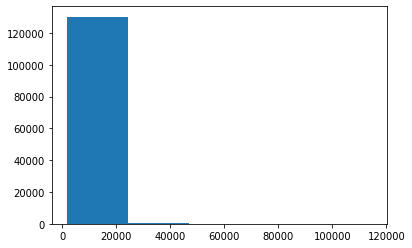

In [82]:
import numpy as np
import matplotlib.pyplot as plt


plt.hist(y_train_scores, bins=5)

In [83]:

# Let's see how many '0's and '1's. We get 452 '0's and 48 '1's.
df_test = pd.DataFrame(X_test)
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<30000, 0, 1)
df_test['cluster'].value_counts()
# Now let's show the summary statistics:
#df_test.groupby('y_by_average_cluster').mean()
df_test.groupby('cluster').mean()

,state_drg_avg_ratio_amount,state_drg_med_ratio_amount,id_avg_ratio_amount,id_med_ratio_amount,city_drg_avg_ratio_amount,city_drg_med_ratio_amount,City_drg_avg_ratio_amount,id_avg_Discharges_ratio_amount,score
cluster,,,,,,,,,
0,0.997960,1.053078,0.999453,1.295893,0.999496,1.010369,0.999067,0.999138,4858.320005
1,2.179445,2.440678,1.743096,3.673834,1.587346,1.862004,1.481048,6.900636,41853.965379


In [276]:
pip install combo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
X_test = X_test[features]

- Training multiple models and then aggregate the scores to improve prediction accuracy. 

In [85]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
# Standardize data
X_train_norm, X_test_norm = standardizer(X_train, X_test)
# Test a range of k-neighbors from 10 to 200. There will be 20 k-NN models.
n_clf = 2
k_list = [2, 3]
# Just prepare data frames so we can store the model results
train_scores = np.zeros([X_train.shape[0], n_clf])
test_scores = np.zeros([X_test.shape[0], n_clf])
train_scores.shape
# Modeling
for i in range(n_clf):
    k = k_list[i]
    clf = PCA(n_components=k)
    clf.fit(X_train_norm)

    # Store the results in each column:
    train_scores[:, i] = clf.decision_scores_
    test_scores[:, i] = clf.decision_function(X_test_norm) 
# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)


### Average

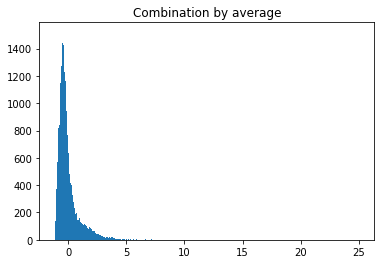

In [87]:
# Combination by average
# The test_scores_norm is 500 x 20. The "average" function will take the average of the 20 columns. The result "y_by_average" is a single column: 
y_by_average = average(test_scores_norm)
import matplotlib.pyplot as plt
plt.hist(y_by_average, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [92]:
df_test = pd.DataFrame(X_test)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<2, 0, 1)
df_test['y_by_average_cluster'].value_counts()

0    31080
1     1533
Name: y_by_average_cluster, dtype: int64

- First, we aggregate the scores of our models by average to see the difference in average scores in two clusters. Then, we made histogram plot to visualize the distribution of the scores. In our case it identifies 1533 data points that have the outlier scores higher than 2. In order to get the summary statistics for each cluster, we do the following code, which produces the average values as below.

In [93]:
df_test.groupby('y_by_average_cluster').mean()


,state_drg_avg_ratio_amount,state_drg_med_ratio_amount,id_avg_ratio_amount,id_med_ratio_amount,city_drg_avg_ratio_amount,city_drg_med_ratio_amount,City_drg_avg_ratio_amount,id_avg_Discharges_ratio_amount,y_by_average_score
y_by_average_cluster,,,,,,,,,
0,0.980411,1.033951,0.952775,1.230994,0.991119,0.999921,0.989996,0.970520,-0.158294
1,1.365304,1.454426,1.953078,2.634908,1.175094,1.230517,1.187681,1.637077,3.139336


- In our case we have nine features. A high value in all features means abnormal, since all of our features indicate the ratio of spending compared to average or median. The summary statistics show the average anomaly score of Cluster 0 is smaller than that of Cluster 1, indicating Cluster 1 to be the anomaly group. This is confirmed by the fact that all features have higher means in Cluster 0. So here we can briefly conclude that the data points in cluster 1 are anomalies by the method of average. 

### Maximum of Maximum

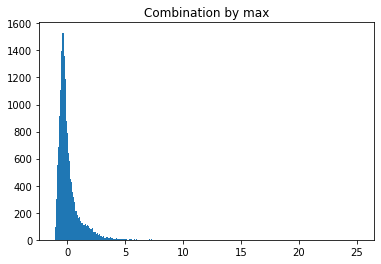

In [95]:

# Combination by mom
y_by_maximization = maximization(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_maximization, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by max")
plt.show()

In [96]:
df_test = pd.DataFrame(X_test)
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score']<2, 0, 1)
df_test['y_by_maximization_cluster'].value_counts()

0    30924
1     1689
Name: y_by_maximization_cluster, dtype: int64

- First, we aggregate the scores of our models by maximum of maximum to see the difference in maximum scores in two clusters. Then, we made histogram plot to visualize the distribution of the scores. In our case it identifies 1689 data points that have the outlier scores higher than 2. In order to get the summary statistics for each cluster, we do the following code, which produces the maximum values as below.

In [ ]:
df_test.groupby('y_by_maximization_cluster').mean()


,cardholder_median_ratio_amount,cardholder_mean_ratio_amount,description_mean_ratio_amount,description_median_ratio_amount,cardholder_mean_ratio_amount_dayofweek,cardholder_median_ratio_amount_dayofweek,cardholder_mean_ratio_amount_per_date,cardholder_median_ratio_amount_per_date,cardholder_mean_ratio_amount_per_month,cardholder_vendor_ratio_amount_per_date,y_by_average_score,y_by_average_cluster,y_by_maximization_score
y_by_maximization_cluster,,,,,,,,,,,,,
0,2.146414,0.795819,0.794588,1.911155,0.837326,2.101710,1.180989,236.998591,1.162352,1.039804,-0.03656,0.000000,-0.016582
1,16.170268,4.355050,3.938186,16.238490,3.630906,15.971388,5.412771,1016.433981,2.285839,2.017378,0.49719,0.804689,0.634147


- In our case we have nine features. A high value in all features means abnormal, since all of our features indicate the ratio of spending compared to average or median. The summary statistics show the maximum anomaly score of Cluster 0 is smaller than that of Cluster 1, indicating Cluster 1 to be the anomaly group. This is confirmed by the fact that all features have higher means in Cluster 0. So here we can briefly conclude that the data points in cluster 1 are anomalies by the method of MoM. 

### The Average of Maximum

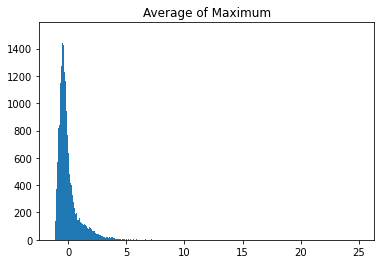

In [99]:
# Combination by aom
y_by_aom = aom(test_scores_norm, n_buckets=2)
             
import matplotlib.pyplot as plt
plt.hist(y_by_aom, bins='auto')  # arguments are passed to np.histogram
plt.title("Average of Maximum")
plt.show()

In [100]:

df_test = pd.DataFrame(X_test)
df_test['y_by_aom_score'] = y_by_aom
df_test['y_by_aom_cluster'] = np.where(df_test['y_by_aom_score']<2, 0, 1)
df_test['y_by_aom_cluster'].value_counts()

0    31080
1     1533
Name: y_by_aom_cluster, dtype: int64

- First, we aggregate the scores of our models by average of maximum to see the difference in average of maximum scores in two clusters. Then, we made histogram plot to visualize the distribution of the scores. In our case it identifies 1533 data points that have the outlier scores higher than 2. In order to get the summary statistics for each cluster, we do the following code, which produces the average of maximum values as below.

In [ ]:
df_test.groupby('y_by_aom_cluster').mean()


,cardholder_median_ratio_amount,cardholder_mean_ratio_amount,description_mean_ratio_amount,description_median_ratio_amount,cardholder_mean_ratio_amount_dayofweek,cardholder_median_ratio_amount_dayofweek,cardholder_mean_ratio_amount_per_date,cardholder_median_ratio_amount_per_date,cardholder_mean_ratio_amount_per_month,cardholder_vendor_ratio_amount_per_date,y_by_average_score,y_by_average_cluster,y_by_maximization_score,y_by_maximization_cluster,y_by_aom_score
y_by_aom_cluster,,,,,,,,,,,,,,,
0,2.204165,0.816623,0.810346,1.974339,0.854815,2.159225,1.220986,240.629994,1.175229,1.049447,-0.033923,0.0,-0.013501,0.012575,-0.033923
1,18.459424,4.817397,4.397040,18.496465,3.971407,18.227693,5.667905,1135.525917,2.309985,2.068530,0.575857,1.0,0.732621,1.000000,0.575857


- In our case we have nine features. A high value in all features means abnormal, since all of our features indicate the ratio of spending compared to average or median. The summary statistics show the Average of maximum anomaly score of Cluster 0 is smaller than that of Cluster 1, indicating Cluster 1 to be the anomaly group. This is confirmed by the fact that all features have higher means in Cluster 0. So here we can briefly conclude that the data points in cluster 1 are anomalies by the method of AoM. 

### Maximum of Average

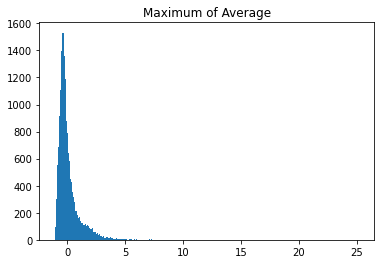

In [103]:

# Combination by moa
y_by_moa = moa(test_scores_norm, n_buckets=2)

import matplotlib.pyplot as plt
plt.hist(y_by_moa, bins='auto')  # arguments are passed to np.histogram
plt.title("Maximum of Average")
plt.show()

In [104]:
df_test = pd.DataFrame(X_test)
df_test['y_by_moa_score'] = y_by_moa
df_test['y_by_moa_cluster'] = np.where(df_test['y_by_moa_score']<2, 0, 1)
df_test['y_by_moa_cluster'].value_counts()

0    30924
1     1689
Name: y_by_moa_cluster, dtype: int64

In [ ]:
df_test.groupby('y_by_moa_cluster').mean()


,cardholder_median_ratio_amount,cardholder_mean_ratio_amount,description_mean_ratio_amount,description_median_ratio_amount,cardholder_mean_ratio_amount_dayofweek,cardholder_median_ratio_amount_dayofweek,cardholder_mean_ratio_amount_per_date,cardholder_median_ratio_amount_per_date,cardholder_mean_ratio_amount_per_month,cardholder_vendor_ratio_amount_per_date,y_by_average_score,y_by_average_cluster,y_by_maximization_score,y_by_maximization_cluster,y_by_aom_score,y_by_aom_cluster,y_by_moa_score
y_by_moa_cluster,,,,,,,,,,,,,,,,,
0,2.146414,0.795819,0.794588,1.911155,0.837326,2.101710,1.180989,236.998591,1.162352,1.039804,-0.03656,0.000000,-0.016582,0.0,-0.03656,0.000000,-0.016582
1,16.170268,4.355050,3.938186,16.238490,3.630906,15.971388,5.412771,1016.433981,2.285839,2.017378,0.49719,0.804689,0.634147,1.0,0.49719,0.804689,0.634147


- In our case we have nine features. A high value in all features means abnormal, since all of our features indicate the ratio of spending compared to average or median. The summary statistics show the Maximum of Average anomaly score of Cluster 0 is smaller than that of Cluster 1, indicating Cluster 1 to be the anomaly group. This is confirmed by the fact that all features have higher maximum of averge score in Cluster 0. So here we can briefly conclude that the data points in cluster 1 are anomalies by the method of MoA. 

In [105]:
%%shell
jupyter nbconvert --to html //content/Healthcare_FE_2.ipynb

[NbConvertApp] Converting notebook //content/Healthcare_FE_2.ipynb to html
[NbConvertApp] Writing 1205272 bytes to //content/Healthcare_FE_2.html
